# Deterministic uncertainty quantification

This notebook corresponds to the section _How much can we trust the predictions?_ of the paper _Interpretable, calibrated neural networks for analysis and understanding of neutron spectra_

To run the models you will need to download the pre-trained network weights, these are available from **10.5281/zenodo.4088240**

You can set up the required _Conda Python_ environment by using the `environment_torch.yml` file included in this repository.

In [1]:
%load_ext autoreload
%autoreload 2
import torch
import torch.utils.data
from torch import nn
from torch.nn import functional as F

import time
import os  
import pickle
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from model import CNN_DUQ as CNN_DUQ_6
import numpy as np
import copy
import matplotlib.pyplot as plt

def norm_im(im):
    maxval = np.max(im)
    minval = np.min(im)
    return (im - minval)/(maxval - minval)

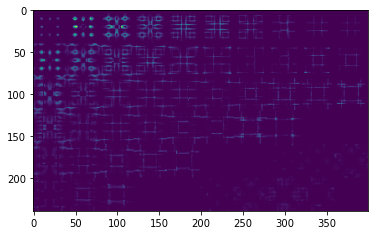

In [2]:
expt_noise = np.load('./unnorm-expt-clipped-120.npy')
expt_clean = np.load('./cleaned-20.npy')
plt.imshow(np.squeeze(expt_clean))
plt.grid(False)
expt_clean = expt_clean.reshape(1, 240, 400, 1)
expt_noise = expt_noise.reshape(1, 240, 400, 1)

## Load pre-trained model

* NB here the experimental spectrum was clipped between 0 and 120 to match with the training data that was used for the model.

In [3]:
model_s = CNN_DUQ_6(input_size=(240, 400, 1), num_classes=2, embedding_size=64,
               learnable_length_scale=False, length_scale=1., gamma=1.)
model_s.load_state_dict(torch.load('../brille/uq-discrim-newer.pt'))

<All keys matched successfully>

In [4]:
print(expt_noise.shape)
expt = norm_im(expt_noise)
expt = expt.reshape(1, 240, 400, 1)

xt = norm_im(expt)
xt = np.moveaxis(xt, -1, 1)
#xt = norm_im(xt)
x =  torch.from_numpy(xt).float()
with torch.no_grad():
    output = model_s(x)
    print('Dimer', 'Goodenough')
    print((output[1].numpy()))

(1, 240, 400, 1)
Dimer Goodenough
[[0.04780354 0.9855526 ]]


### Try Franken-data

In [5]:
for fdat in ['./fraken-data-unnorm.npy', './fraken-data-norm.npy']:
    expt_f = np.load(fdat)
    print(fdat)
    expt = norm_im(expt_f)
    expt = expt.reshape(1, 240, 400, 1)
    xt = norm_im(expt)
    xt = np.moveaxis(xt, -1, 1)
    x =  torch.from_numpy(xt).float()

    with torch.no_grad():
        output = model_s(x)
        print('Dimer', 'Goodenough')
        print((output[1].numpy()))
    print()

./fraken-data-unnorm.npy
Dimer Goodenough
[[0.6630808 0.5292397]]

./fraken-data-norm.npy
Dimer Goodenough
[[0.35497963 0.8490647 ]]

